In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
GROUPS = 5
BARS = 4

In [3]:
# generate some data
x = []
for i in range(0,BARS):
    x = x + [np.random.rand(100,GROUPS)]

In [4]:
COLS = ["red", "green", "blue", "orange"]
DIST = 7

Text(0,0.5,'fraction converged')

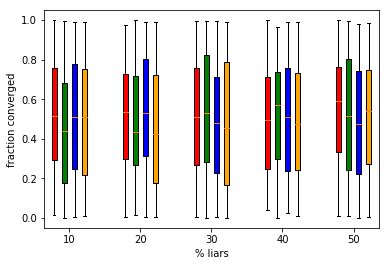

In [14]:
%matplotlib inline

def plotme(i):
    pos = []
    for j in range(0, GROUPS):
        pos = pos + [i+1 + j*DIST]
    ax.boxplot(x[i], positions=pos, patch_artist=True, boxprops=dict(facecolor=COLS[i]))
        
fig,ax = plt.subplots(1,1)

for i in range(0, BARS):
    plotme(i)

ax.set_xlim(0, DIST * (GROUPS-1) + BARS + 1)
xticks = []
xtickslbls = []
for i in range(0, GROUPS):
    xticks = xticks + [(BARS + 1.0) / 2.0 + i * DIST]
    xtickslbls = xtickslbls + [(i+1) * 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslbls)
ax.set_xlabel("% liars")
ax.set_ylabel("fraction converged")